## 第一题（1）

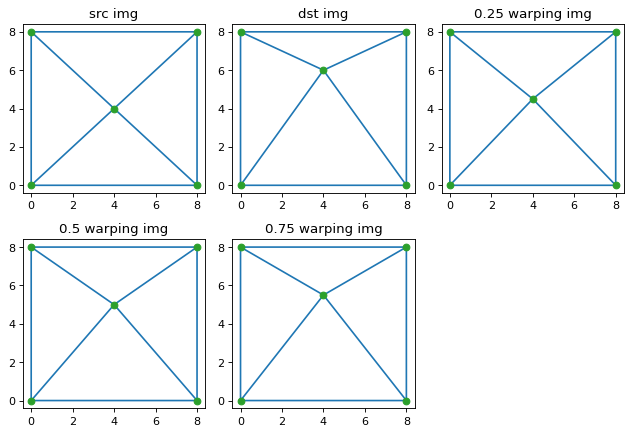

In [18]:
# 计算特征点在 t=0.25,0.5 和 0.75 时候的平均形状;

import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import Delaunay

src_img = np.zeros([9, 9])
src_img[:, 4] = 1
src_img[4, :] = 1

dst_img = np.asarray([[2, 5, 5, 5, 5, 5, 5, 5, 4],
                      [2, 2, 5, 5, 5, 5, 5, 5, 4],
                      [2, 2, 2, 2, 5, 5, 5, 4, 4],
                      [2, 2, 2, 2, 2, 5, 5, 4, 4],
                      [2, 2, 2, 2, 2, 2, 2, 4, 4],
                      [2, 2, 2, 2, 2, 3, 3, 4, 4],
                      [2, 2, 2, 3, 3, 3, 3, 3, 4],
                      [2, 2, 3, 3, 3, 3, 3, 3, 4],
                      [2, 3, 3, 3, 3, 3, 3, 3, 3], ])
img_new = np.zeros([9, 9])

src_points = np.array([[0, 0], [0, 8], [4, 4], [8, 0], [8, 8]])
dst_points = np.array([[0, 0], [0, 8], [4, 6], [8, 0], [8, 8]])


def get_tem_point(src_arr, dst_arr, t):
    if t < 0 or t > 1:
        raise NameError
    return np.dot((1 - t), src_arr) + np.dot(t, dst_arr)


def draw_tri(points, tri, plt_pos, title=''):
    plt.subplot(plt_pos).set_title(title)
    plt.triplot(points[:, 0], points[:, 1], tri.simplices)
    plt.plot(points[:, 0], points[:, 1], 'o')


# plot Delaunay triangulation
plt.figure(figsize=(8, 8), dpi=80)

src_tri = Delaunay(src_points)
draw_tri(src_points, src_tri, 331, 'src img')

dst_tri = Delaunay(dst_points)
draw_tri(dst_points, dst_tri, 332, 'dst img')

tem_points = get_tem_point(src_points, dst_points, 0.25)
tem_tri = Delaunay(tem_points)
draw_tri(tem_points, tem_tri, 333, '0.25 warping img')

tem_points = get_tem_point(src_points, dst_points, 0.5)
tem_tri = Delaunay(tem_points)
draw_tri(tem_points, tem_tri, 334, '0.5 warping img')

tem_points = get_tem_point(src_points, dst_points, 0.75)
tem_tri = Delaunay(tem_points)
draw_tri(tem_points, tem_tri, 335, '0.75 warping img')

plt.tight_layout()

## 第一题（2）(3)

t = 0.5
src img:
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]
new img:
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]
t = 0.5
dst img:
[[2 5 5 5 5 5 5 5 4]
 [2 2 5 5 5 5 5 5 4]
 [2 2 2 2 5 5 5 4 4]
 [2 2 2 2 2 5 5 4 4]
 [2 2 2 2 2 2 2 4 4]
 [2 2 2 2 2 3 3 4 4]
 [2 2 2 3 3 3 3 3 4]
 [2 2 3 3 3 3 3 3 4]
 [2 3 3 3 3 3 3 3 3]]
new img:
[[2. 5. 5. 5. 5. 5. 5. 5. 4.]
 [2. 2. 5. 5. 5. 5. 5. 5. 4.]
 [2. 2. 2. 5. 5. 5. 5. 4. 4.]
 [2. 2. 2. 2. 5. 5. 4. 4. 4.]
 [2. 2. 2. 2. 2. 2. 4. 4. 4.]
 [2. 2. 2. 2. 3. 3. 4. 4. 4.]
 [2. 2. 2. 3. 3. 3. 3. 3. 4.]
 [2. 2

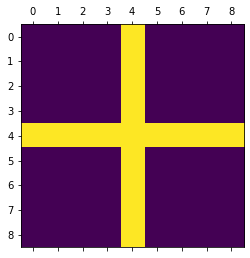

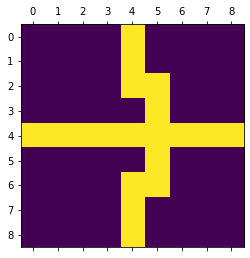

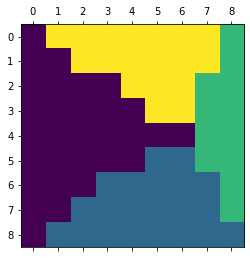

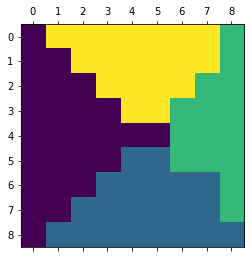

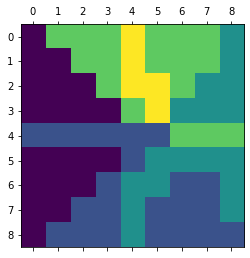

In [19]:
# 计算 t=0.5 时，源图像和目标图像向平均形状的变形结果;(图像变形均 采用最近邻插值)


class morphing():

    def __init__(self, src_img, dst_img, src_points, dst_points):
        self.tmp_dela_tri = []
        self.dst_dela_tri = []
        self.src_dela_tri = []

        self.tmp2src = dict()
        self.tmp2dst = dict()

        self.src_img = src_img
        self.dst_img = dst_img
        self.new_src_img = []
        self.new_dst_img = []

        self.src_points = src_points
        self.dst_points = dst_points
        self.tmp_points = []
        self.t = 0.5
        self.get_tem_point()
        self.delaunay()

    def set_t(self, t):
        self.t = t
        self.get_tem_point()
        self.delaunay()

    def get_tem_point(self):
        if self.t < 0 or self.t > 1:
            raise NameError
        self.tmp_points = np.dot((1 - self.t), self.src_points) + np.dot(self.t, self.dst_points)

        tmp = [tuple(x) for x in self.tmp_points]
        src = [tuple(x) for x in self.src_points]
        dst = [tuple(x) for x in self.dst_points]

        self.tmp2src = dict(zip(tmp, src))
        self.tmp2dst = dict(zip(tmp, dst))

    def delaunay(self):
        self.tmp_dela_tri = Delaunay(self.tmp_points)
        self.dst_dela_tri = Delaunay(self.dst_points)
        self.src_dela_tri = Delaunay(self.src_points)

    def get_matrix_T(self, tri_cords):
        return np.vstack((tri_cords[:, 0], tri_cords[:, 1], np.asarray([1, 1, 1])))

    def morph(self, target='src'):
        if target == 'src':
            dst_img = self.src_img
            dst_tri = self.src_dela_tri
            src2dst = self.tmp2src
        elif target == 'dst':
            dst_img = self.dst_img
            dst_tri = self.dst_dela_tri
            src2dst = self.tmp2dst
        else:
            raise NameError

        src_tri = self.tmp_dela_tri
        src_points = self.tmp_points
        new_img = np.zeros(dst_img.shape)

        # 后向变换 维护一个点与点对应的矩阵
        for x, col in enumerate(dst_img):
            for y, val in enumerate(col):
                # tri_id 该坐标所在的Delaunay三角形的序号
                src_tri_id = src_tri.find_simplex((x, y))
                # tri_cords 该坐标所在的三角形的顶点坐标
                src_tri_cords = src_points[src_tri.simplices[src_tri_id]]
                dst_tri_cords = src_tri_cords.copy()

                # 取得对应三角形顶点坐标
                for i, cord in enumerate(src_tri_cords):
                    dst_tri_cords[i] = src2dst[tuple(cord)]
                # print(dst_tri_cords)

                T_src = self.get_matrix_T(src_tri_cords)
                T_dst = self.get_matrix_T(dst_tri_cords)

                X = np.asarray([x, y, 1])
                para = np.linalg.inv(T_src).dot(X.T)
                new_cord = T_dst.dot(para).T
                new_cord = np.round(new_cord).astype(int)

                # print(new_cord)
                old_val = dst_img[new_cord[0], new_cord[1]]
                new_img[x, y] = old_val

        print("t = {}".format(self.t))
        plt.matshow(dst_img)
        print('{} img:'.format(target))
        print(dst_img)
        plt.matshow(new_img)
        print('new img:'.format(target))
        print(new_img)
        return new_img

    def average(self, img_1, img_2):
        avg_img = np.dot(np.add(img_1, img_2), 1 / 2)
        plt.matshow(avg_img)
        print('avg img:')
        print(avg_img)
        return avg_img


src_img = np.zeros([9, 9])
src_img[:, 4] = 1
src_img[4, :] = 1

dst_img = np.asarray([[2, 5, 5, 5, 5, 5, 5, 5, 4],
                      [2, 2, 5, 5, 5, 5, 5, 5, 4],
                      [2, 2, 2, 2, 5, 5, 5, 4, 4],
                      [2, 2, 2, 2, 2, 5, 5, 4, 4],
                      [2, 2, 2, 2, 2, 2, 2, 4, 4],
                      [2, 2, 2, 2, 2, 3, 3, 4, 4],
                      [2, 2, 2, 3, 3, 3, 3, 3, 4],
                      [2, 2, 3, 3, 3, 3, 3, 3, 4],
                      [2, 3, 3, 3, 3, 3, 3, 3, 3], ])

src_points = np.array([[0, 0], [0, 8], [4, 4], [8, 0], [8, 8]])
dst_points = np.array([[0, 0], [0, 8], [4, 6], [8, 0], [8, 8]])

m = morphing(src_img, dst_img, src_points, dst_points)
m.set_t(0.5)
a = m.morph(target='src')
b = m.morph(target='dst')
c = m.average(a, b)

# 获取三角形每个顶点的坐标
# print(src_points[src_tri.simplices])
# print(dst_points[dst_tri.simplices])

## 第二题 (1)(2)

行方向梯度: axis = 1:
[[    0.     0.  -381.  -765.     0.   765.   381.     0.     0.]
 [    0.     0.  -508. -1020.     0.  1020.   508.     0.     0.]
 [ -127.     0.  -381.  -893.     0.   893.   381.     0.   127.]
 [ -509.     0.  -127.  -511.     0.   511.   127.     0.   509.]
 [ -764.     0.     0.  -256.     0.   256.     0.     0.   764.]
 [ -509.     0.  -127.  -511.     0.   511.   127.     0.   509.]
 [ -127.     0.  -381.  -893.     0.   893.   381.     0.   127.]
 [    0.     0.  -508. -1020.     0.  1020.   508.     0.     0.]
 [    0.     0.  -381.  -765.     0.   765.   381.     0.     0.]] 
 
 列方向梯度: axis = 0:
[[    0.     0.  -127.  -509.  -764.  -509.  -127.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [ -381.  -508.  -381.  -127.     0.  -127.  -381.  -508.  -381.]
 [ -765. -1020.  -893.  -511.  -256.  -511.  -893. -1020.  -765.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [  765.  1020.   893.   511.   256. 

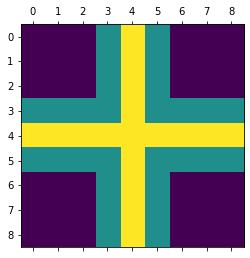

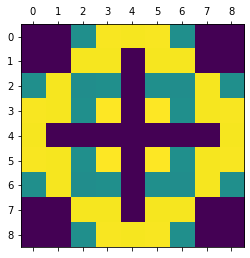

In [20]:
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros([9, 9])
img[3:6, ...] = 127
img[..., 3:6] = 127
img[4, ...] = 255
img[..., 4] = 255
plt.matshow(img)
g = np.gradient(img)
print('行方向梯度: axis = 1:\n{} \n \n 列方向梯度: axis = 0:\n{}'.format(g[1], g[0]))

energy = np.bitwise_or(np.uint8(np.absolute(g[0])),
                       np.uint8(np.absolute(g[1])))
print('能量矩阵：\n{}'.format(energy))
plt.matshow(energy)

## 第二题 (3)-(6)

初始化值矩阵: 
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [127.   0.   0.   0.   0.   0.   0.   0.   0.]
 [253.   0.   0.   0.   0.   0.   0.   0.   0.]
 [252.   0.   0.   0.   0.   0.   0.   0.   0.]
 [253.   0.   0.   0.   0.   0.   0.   0.   0.]
 [127.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]] 
 初始化路径矩阵: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
X方向 最终值矩阵: 
[[  0.   0. 127. 380. 629. 505. 631. 631. 504.]
 [  0.   0. 252. 377. 252. 504. 631. 504. 504.]
 [127. 252. 125. 252. 252. 379. 504. 631. 631.]
 [253. 379. 379. 380. 252. 507. 379. 504. 505.]
 [252. 252. 252. 252. 252. 252. 252. 252. 504.]
 [253. 379. 379. 380. 2

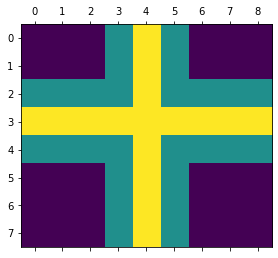

In [24]:
import numpy as np
from matplotlib import pyplot as plt


class seam():
    def __init__(self, img):
        self.img = img.T
        g = np.gradient(self.img)
        self.energy = np.bitwise_or(np.uint8(np.absolute(g[0])),
                       np.uint8(np.absolute(g[1])))
        self.value_mat = np.zeros(energy.shape)
        self.value_mat[0, ...] = energy[0, ...]
        self.path_mat = np.zeros(energy.shape)
        print('初始化值矩阵: \n{} \n 初始化路径矩阵: \n{}'.format(self.value_mat.T, self.path_mat.T))

    def scan(self):
        shape = self.energy.shape
        for row in range(1, shape[0]):
            for col in range(shape[1]):
                self.value_mat[row, col] = self.testify(row, col)

        print('X方向 最终值矩阵: \n{} \n 最终路径矩阵: \n{}'.format(self.value_mat.T, self.path_mat.T))

        seam = self.chase_back()
        print('X方向最佳seam: \n{}'.format(seam))

        new_img=self.delete_seam(seam)
        plt.matshow(new_img.T)

    def testify(self, row, col):
        '''
        #M(i, j) = e(i, j) + min(M(i-1, j-1), M(i-1, j), M(i-1, j + 1))
        :param energy:
        :return:
        '''
        shape = self.energy.shape
        if row <= 0:
            raise ValueError
        if col == 0:
            M = self.value_mat[row - 1, col]
            R = self.value_mat[row - 1, col + 1]
            minmal = min([M, R])
            index = [M, R].index(minmal)
        elif col == shape[1] - 1:
            L = self.value_mat[row - 1, col - 1]
            M = self.value_mat[row - 1, col]
            minmal = min([L, M])
            index = [L, M].index(minmal) - 1
        else:
            L = self.value_mat[row - 1, col - 1]
            M = self.value_mat[row - 1, col]
            R = self.value_mat[row - 1, col + 1]
            minmal = min([L, M, R])
            index = [L, M, R].index(minmal) - 1

        self.path_mat[row, col] = index
        return energy[row, col] + minmal

    def chase_back(self):
        seam = []
        shape = self.energy.shape

        minmal = 99999999
        min_col = 0
        for index, val in enumerate(self.value_mat[shape[0] - 1, ...]):
            if minmal > val:
                minmal = val
                min_col = index
        min_row = shape[0] - 1
        for _ in range(shape[0], 0, -1):
            direction = int(self.path_mat[min_row, min_col])
            seam.append(min_col)
            min_row -= 1
            min_col += direction
        return seam

    def delete_seam(self,seam):
        image=self.img.copy()
        rows, cols = energy.shape
        #remove seam from image and adjust all other cols
        for row in range(rows):
            #remove seam from imae and move over all other cols
            for col in range(int(seam[row]), cols - 1):
                image[row, col] = image[row, col + 1]
        small_image = image[:, 0:cols - 1]
        return small_image


img = np.zeros([9, 9])
img[3:6, ...] = 127
img[..., 3:6] = 127
img[4, ...] = 255
img[..., 4] = 255



s = seam(img)
s.scan()

## 第二题 (7)-(10)

初始化值矩阵: 
[[  0.   0. 127. 253. 252. 253. 127.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.]] 
 初始化路径矩阵: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
X方向 最终值矩阵: 
[[  0.   0. 127. 253. 252. 253. 127.   0.   0.]
 [  0.   0. 252. 379. 252. 379. 252.   0.   0.]
 [127. 252. 125. 379. 252. 379. 125. 252. 127.]
 [380. 377. 252. 380. 252. 380. 252. 377. 380.]
 [629. 252. 252. 252. 252. 252. 252. 252. 629.]
 [505. 504. 379. 507. 2

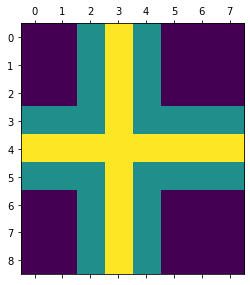

In [22]:
import numpy as np
from matplotlib import pyplot as plt


class seam():
    def __init__(self, img):
        self.img = img
        g = np.gradient(self.img)
        self.energy = np.bitwise_or(np.uint8(np.absolute(g[0])),
                                    np.uint8(np.absolute(g[1])))
        self.value_mat = np.zeros(energy.shape)
        self.value_mat[0, ...] = energy[0, ...]
        self.path_mat = np.zeros(energy.shape)
        print('初始化值矩阵: \n{} \n 初始化路径矩阵: \n{}'.format(self.value_mat, self.path_mat))

    def scan(self):
        shape = self.energy.shape
        for row in range(1, shape[0]):
            for col in range(shape[1]):
                self.value_mat[row, col] = self.testify(row, col)

        print('X方向 最终值矩阵: \n{} \n 最终路径矩阵: \n{}'.format(self.value_mat, self.path_mat))

        seam = self.chase_back()
        print('X方向最佳seam: \n{}'.format(seam))

        new_img=self.delete_seam(seam)
        plt.matshow(new_img)

    def testify(self, row, col):
        '''
        #M(i, j) = e(i, j) + min(M(i-1, j-1), M(i-1, j), M(i-1, j + 1))
        :param energy:
        :return:
        '''
        shape = self.energy.shape
        if row <= 0:
            raise ValueError
        if col == 0:
            M = self.value_mat[row - 1, col]
            R = self.value_mat[row - 1, col + 1]
            minmal = min([M, R])
            index = [M, R].index(minmal)
        elif col == shape[1] - 1:
            L = self.value_mat[row - 1, col - 1]
            M = self.value_mat[row - 1, col]
            minmal = min([L, M])
            index = [L, M].index(minmal) - 1
        else:
            L = self.value_mat[row - 1, col - 1]
            M = self.value_mat[row - 1, col]
            R = self.value_mat[row - 1, col + 1]
            minmal = min([L, M, R])
            index = [L, M, R].index(minmal) - 1

        self.path_mat[row, col] = index
        return energy[row, col] + minmal

    def chase_back(self):
        seam = []
        shape = self.energy.shape

        minmal = 99999999
        min_col = 0
        for index, val in enumerate(self.value_mat[shape[0] - 1, ...]):
            if minmal > val:
                minmal = val
                min_col = index
        min_row = shape[0] - 1
        for _ in range(shape[0], 0, -1):
            direction = int(self.path_mat[min_row, min_col])
            seam.append(min_col)
            min_row -= 1
            min_col += direction
        return seam

    def delete_seam(self,seam):
        image=self.img.copy()
        rows, cols = energy.shape
        #remove seam from image and adjust all other cols
        for row in range(rows):
            #remove seam from imae and move over all other cols
            for col in range(int(seam[row]), cols - 1):
                image[row, col] = image[row, col + 1]
        small_image = image[:, 0:cols - 1]
        return small_image


img = np.zeros([9, 9])
img[3:6, ...] = 127
img[..., 3:6] = 127
img[4, ...] = 255
img[..., 4] = 255



s = seam(img)
s.scan()

